In [30]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

attr = ['time/total_timesteps','time/time_elapsed','rollout/ep_rew_mean']

sns.set_theme(style="darkgrid")
cartpole_dqn = pd.read_csv('results/cartpole_dqn/progress.csv')
cartpole_dqn = cartpole_dqn[attr]

cartpole_ppo_env8 = pd.read_csv('results/cartpole_ppo_env8/progress.csv')
cartpole_ppo_env8 = cartpole_ppo_env8[attr]

cartpole_ppo_env4 = pd.read_csv('results/cartpole_ppo_env4/progress.csv')
cartpole_ppo_env4 = cartpole_ppo_env4[attr]

cartpole_ppo_env1 = pd.read_csv('results/cartpole_ppo_env_1/progress.csv')
cartpole_ppo_env1 = cartpole_ppo_env1[attr]

cartpole_a2c_env1 = pd.read_csv('results/cartpole_a2c_env1/progress.csv')
cartpole_a2c_env1 = cartpole_a2c_env1[attr]


In [59]:
cartpole_dqn['algol'] = 'DQN'
cartpole_ppo_env8['algol'] = 'PPO_env8'
cartpole_ppo_env4['algol'] = 'PPO_env4'
cartpole_ppo_env1['algol'] = 'PPO_env1'
cartpole_a2c_env1['algol'] = 'A2C_env1'


df = pd.concat([
    cartpole_dqn, 
    cartpole_ppo_env8, 
    cartpole_ppo_env1, 
    cartpole_a2c_env1, 
    cartpole_ppo_env4])

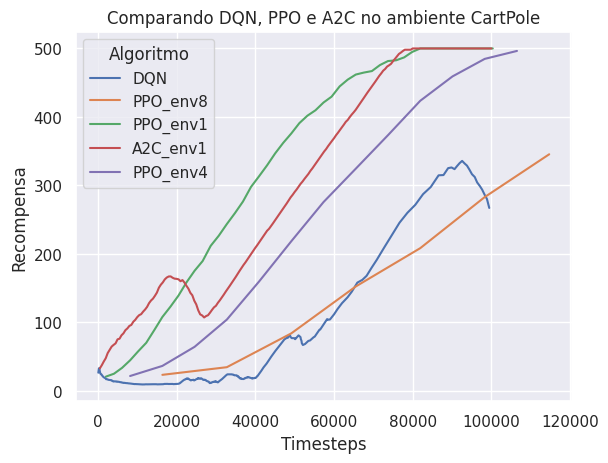

In [60]:
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando DQN, PPO e A2C no ambiente CartPole')
plt.legend(title='Algoritmo')
plt.show()

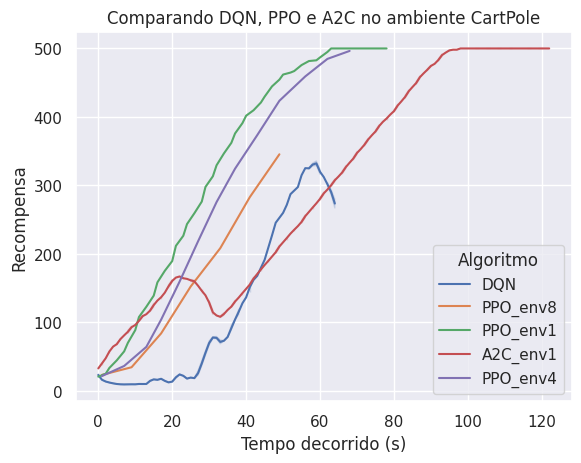

In [62]:
sns.lineplot(x="time/time_elapsed", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Tempo decorrido (s)')
plt.ylabel('Recompensa')
plt.title('Comparando DQN, PPO e A2C no ambiente CartPole')
plt.legend(title='Algoritmo')
plt.show()

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

walker_ppo_env1 = pd.read_csv('results/bipedalwalker_ppo/progress.csv')
walker_ppo_env1 = walker_ppo_env1[attr]

walker_a2c_env1 = pd.read_csv('results/bipedal_walker_a2c/progress.csv')
walker_a2c_env1 = walker_a2c_env1[attr]

walker_ppo_hf = pd.read_csv('results/bipedalwalker_ppo_hugging_face/progress.csv')
walker_ppo_hf = walker_ppo_hf[attr]


In [68]:
walker_a2c_env1['algol'] = 'A2C_env1'
walker_ppo_env1['algol'] = 'PPO_env1'
walker_ppo_hf['algol'] = 'PPO_HF'

df = pd.concat([
    walker_ppo_env1, 
    walker_a2c_env1,
    walker_ppo_hf])

In [69]:
df = df.reset_index(drop=True)

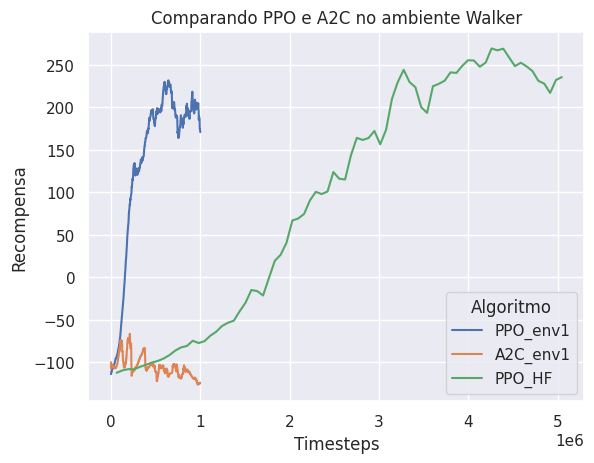

In [70]:
sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue='algol', data=df)
plt.xlabel('Timesteps')
plt.ylabel('Recompensa')
plt.title('Comparando PPO e A2C no ambiente Walker')
plt.legend(title='Algoritmo')
plt.show()